# <center>Đồ án 02 - Phân Tích Dữ Liệu</center>

## Mục lục
* [Bảng phân công công viêc](#c1)
* [Cách chạy Project](#c2)
* [Nội dung](#c3)
    * [Mong đợi những gì ở dữ liệu ?](#c31)
    * [Danh sách kiểm tra phân tích dữ liệu](#c32)
    * [Trả lời những câu hỏi về bộ dữ liệu](#c33)    
    * [Xóa dữ liệu](#c34)
        * [Dữ liệu có bị thiếu ?](#c341)
        * [Kiểu dữ liệu](#c342)
        * [Kiểm tra ngoại lệ](#c343)
        * [Tiền xử lý dữ liệu](#c344)
    * [Phân tích khám phá](#c35)
        * [Trực quan hoá mối quan hệ đơn biến](#c351)
        * [Trực quan hoá mối quan hệ đa biến](#c352)
            * [Scatter plot](#c3521)
            * [Correlation Matrix](#c3522)

## BẢNG PHÂN CÔNG CÔNG VIỆC <a class="anchor" id="c1"></a>

STT&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Thông tin sinh viên&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Mức độ hoàn thành&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Công việc
<br>
1&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;&ensp;&nbsp;Nguyễn Đăng Thi-19127276&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp;&nbsp;100%&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp;&nbsp;&ensp;Scatterplot, Pie chart, Bar chart
<br>
2&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Lê Minh Trí-19127592&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;100%&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp;&nbsp;&ensp;Histogram, Boxplot
<br>
3&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Phan Vĩ Giai-19127639&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;100%&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp;&nbsp;&ensp;Xóa dữ liệu, Correlation Matrix
<br>
4&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Võ Nhất Huy-19127642&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;&nbsp;&nbsp;100%&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp;&nbsp;&ensp;Trả lời câu hỏi về dữ liệu, Line chart

## CÁCH CHẠY PROJECT <a class="anchor" id="c2"></a>
**Chọn Kernel -> Restart & Run All**

## Nội dung <a class="anchor" id="c3"></a>

In [1]:
%matplotlib inline
import datetime
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
playlists_file = './Api_data/playlists.csv'
tracks_file = './Api_data/tracks.csv'
users_file = './Api_data/users.csv'

<strong>Biến toàn cục</strong>
<br>
Đọc dữ liệu dưới dạng DataFrame

In [3]:
df_playlists = pd.read_csv(playlists_file, delimiter='\t')
df_tracks = pd.read_csv(tracks_file, delimiter='\t')
df_users= pd.read_csv(users_file, delimiter='\t')

### Mong đợi những gì ở dữ liệu ? <a class="anchor" id="c31"></a>

### Danh sách kiểm tra phân tích dữ liệu <a class="anchor" id="c32"></a>

### Trả lời những câu hỏi về bộ dữ liệu <a class="anchor" id="c33"></a>

### Xóa dữ liệu <a class="anchor" id="c34"></a>

In [4]:
def get_object(file_name):
    df = pd.read_csv(file_name, delimiter='\t')
    obj = {}
    for column in df.columns:
        obj.setdefault(column, df[column].values)
    return obj

In [5]:
def get_object_formatted(cols):
    formatted_obj = {}
    for key in cols.keys():
        col_values = cols[key]
        missing_values = [x for x in col_values if x == '' or (not isinstance(x, str) and math.isnan(x))]
        values = [x for x in col_values if x != '' and not (not isinstance(x, str) and math.isnan(x))]
        formatted_obj[key] = [len(missing_values)/len(col_values) * 100, len(set(values)), set(values)]
    return formatted_obj

In [6]:
def print_info(obj):
    print(f"{'ColName':20} {'Miss(%)':7} {'NumDifVals':10} {'SomeVals'}")
    for col_name, col_profile in obj.items():
        print(f'{col_name:20} {col_profile[0]:<7.3f} {col_profile[1]:<10} {col_profile[2].__repr__()[:34]+"...":<}')

### Dữ liệu có bị thiếu ? <a class="anchor" id="c341"></a>

- Tạo thêm object mới cho việc kiểm tra dữ liệu

In [7]:
playlists_obj = get_object_formatted(get_object(playlists_file))
tracks_obj = get_object_formatted(get_object(tracks_file))
users_obj = get_object_formatted(get_object(users_file))

In [8]:
print_info(playlists_obj)

ColName              Miss(%) NumDifVals SomeVals
id                   0.000   2175       {52264968, 729101, 39485458, 10671...
user_id              0.000   632        {7, 9, 11, 16, 17, 20, 21, 24, 25,...
title                0.000   2082       {'Selected Mixes', 'Lounge', 'Comm...
created_at           0.000   2175       {'2015-09-25T13:22:10Z', '2019-09-...
last_modified        0.000   2138       {'2015-10-13T14:14:41Z', '2021-05-...
license              0.000   6          {'cc-', 'all-rights-reserved', 'cc...
likes_count          0.000   194        {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,...
permalink_url        0.000   2175       {'https://soundcloud.com/soma/sets...
public               0.000   1          {True}...
purchase_url         1.195   428        {'https://www.beatport.com/release...
reposts_count        0.000   75         {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,...
secret_token         0.000   1          {'None'}...
sharing              0.000   1          {'public'}...
tag_list       

**Dựa vào kết quả ở trên:**
- Cột "tag_list", "set_type" có phần trăm thiếu khá lớn: 62.207% và 67.402%. Theo suy đoán, do "tag_list" là thẻ tag được gắn cho playlist và "set_type" là loại playlist nên cả 2 cột này khi người dùng tạo playlist mới là thuộc tính tùy chọn. Có thể họ có thể quên, bỏ sót những thuộc tính không quan trọng này.
- Cột "trackIds" có phần trăm thiếu khoảng 7.908%. Con số này nói lên rằng, nhiều playlist được tạo nhưng không có track nào thuộc playlist đó.
- Tất cả các cột còn lại có phần trăm thiếu bằng 0 hay cực kì nhỏ nên mọi thứ "tốt đẹp".

In [9]:
print_info(tracks_obj)

ColName              Miss(%) NumDifVals SomeVals
id                   0.000   10242      {336297989, 44204041, 1140686857, ...
user_id              0.000   2768       {336748548, 19554314, 7184394, 258...
title                0.000   10190      {'Weltareh (Prins Thomas Miks Del ...
description          17.874  6040       {'Boiler Room x Innervisions w/ Di...
track_format         0.000   1          {'single-track'}...
uri                  0.000   10242      {'https://api.soundcloud.com/track...
caption              0.000   132        {'Here is another more ambient lik...
comment_count        0.000   569        {'569', '187', '191', '14681', '27...
created_at           0.000   9765       {'2016-09-26T20:30:59Z', '2018-08-...
duration             0.000   8435       {458752, 7372800, 327680, 98307, 0...
genre                13.451  1973       {'Classical not Classical', 'Curse...
last_modified        0.000   9107       {'2020-11-24T02:25:30Z', '2015-11-...
license              0.000   8   

**Dựa vào kết quả ở trên:**
- Cột "description", "genre" có phần trăm thiếu lần lượt là 17.874% và 13.451% cũng đáng để chúng ta xem xét. Cột "description" bị thiếu là do bài hát "bị bỏ quên" phần mô tả (mô tả là tùy chọn) và cũng tương tự với "genre", cột "genre" bị thiếu do bài hát không được gán nhãn thuộc thể loại nào.
- Các cột còn lại đều không bị thiếu.

In [10]:
print_info(users_obj)

ColName              Miss(%) NumDifVals SomeVals
id                   0.000   1763       {1, 2, 6, 7, 8, 9, 10, 11, 12, 15,...
username             0.000   1763       {'Tracks4DJ', 'p2mate', 'Felix Zen...
first_name           19.399  943        {'Franck', 'Italo Deviance /', 'Du...
last_name            27.907  1198       {'M', 'Grasso', 'Cirovic', 'gupta'...
full_name            18.945  1418       {'Steve Nalepa', 'Barbara Hallama'...
city                 8.281   437        {'Cholula_Puebla_', 'Spain', 'Fran...
avatar_url           0.000   1409       {'https://i1.sndcdn.com/avatars-00...
playlist_count       0.000   65         {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,...
track_count          0.000   181        {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 515...
description          16.846  785        {'Composer http://soundcloud.com/b...
followers_count      0.000   961        {0, 2049, 1, 3, 4, 5, 6, 7, 8, 9, ...
followings_count     0.000   523        {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,...
groups_count   

**Dựa vào kết quả ở trên:**
- Đầu tiên, ta chú ý đến ba cột "first_name", "last_name", "full_name" đều có phần trăm thiếu khoảng 20%. Theo suy đoán thì có thể người dùng họ nhập dữ liệu cho 1 hoặc 2 trong 3 trường, do 3 trường này là thuộc tính tùy chọn. Nên họ nhập 1 trong 3 hay 2 trong 3 là đạt yêu cầu. Việc này dẫn đến phẩn trăm thiếu như trên.
- Cũng giống như tập dữ liệu "tracks", cột "description" bị thiếu khoảng 16.846% do người dùng không mô tả cho bản thân vì đây là trường tùy chọn (tùy theo sở thích của mỗi người).
- Cột "city" bị thiếu khoảng 8.281% cũng có ý nghĩa tương tự là do người dùng không khai báo thành phố nơi họ đang sống...

### Kiểu dữ liệu <a class="anchor" id="c342"></a>

**Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?**
- Ở đây, chúng ta xem xét kiểu dữ liệu của từng tập dữ liệu của chúng ta gồm: playlists, tracks, users.
- Và xem xét liệu có kiểu dữ liệu nào chưa phù hợp.

In [11]:
df_playlists.dtypes

id                int64
user_id           int64
title            object
created_at       object
last_modified    object
license          object
likes_count       int64
permalink_url    object
public             bool
purchase_url     object
reposts_count     int64
secret_token     object
sharing          object
tag_list         object
uri              object
set_type         object
is_album           bool
trackIds         object
dtype: object

**Đối với tập dữ liệu playlists**
- Các cột "id", "user_id", "likes_count", "reposts_count" có kiểu dữ liệu kiểu số là chính xác.
- Cột "title", "license", "permalink_url", "purchase_url", "secret_token", "sharing", "tag_list", "uri", "set_type", "is_album", "trackIds": các cột này có kiểu dữ liệu là chuỗi.
- Cột "created_at", "last_modified" hiện có dữ liệu là chuyển. Chúng ta cần chuyển từ kiểu dữ liệu dạng chuỗi sang datetime.

In [12]:
df_tracks.dtypes

id                 int64
user_id            int64
title             object
description       object
track_format      object
uri               object
caption           object
comment_count     object
created_at        object
duration           int64
genre             object
last_modified     object
license           object
likes_count       object
permalink_url     object
playback_count    object
reposts_count      int64
state             object
dtype: object

**Đối với tập dữ liệu tracks**
- Cột "id", "user_id", "duration", "reposts_count" có kiểu dữ liệu số.
- Cột "title", "description", "track_format", "uri", "caption", "genre", "license", "permalink_url", "state" có kiểu dạng chuỗi.
- Chúng ta cần chuyển lại kiểu dữ liệu chuỗi sang datetime cho các cột "created_at", "last_modified".
- Và các cột "comment_count", "likes_count", "playback_count" có kiểu dữ liệu chưa chính xác. Hiện các cột này đang có dữ liệu là chuỗi, chúng ta cần chuyển sang kiểu số. Lý do các cột này chưa chính xác là do các giá trị của cột bị thiếu, và gía trị mặc định của các giá trị thiếu là "None" nên ảnh hưởng đến kiểu dữ liệu của cột.

In [13]:
df_users.dtypes

id                       int64
username                object
first_name              object
last_name               object
full_name               object
city                    object
avatar_url              object
playlist_count           int64
track_count              int64
description             object
followers_count          int64
followings_count         int64
groups_count             int64
likes_count              int64
comments_count           int64
playlist_likes_count     int64
last_modified           object
created_at              object
verified                  bool
dtype: object

**Đối với tập dữ liệu users**
- Cột "id", "playlist_count", "track_count", "followers_count", "followings_count", "groups_count", "likes_count", "comments_count", "playlist_likes_count" đều có kiểu dữ liệu đúng với mong muốn của chúng ta là kiểu số.
- Cột "username", "first_name", "last_name", "full_name", "city", "avatar_url", "description" có kiểu dữ liệu là chuỗi là chính xác.
- Ta thấy cột "last_modified", "created_at" có kiểu dữ liệu là chuỗi. Chúng ta cần chuyển sang dạng datetime cho hai cột đó mới chính xác.

### Kiểm tra ngoại lệ <a class="anchor" id="c343"></a>

### Tiền xử lý dữ liệu <a class="anchor" id="c344"></a>

- Chúng ta sẽ xử lý các vấn đề bên trên đã nêu bao gồm:
    - Chuyển đổi chuỗi sang datetime cho 3 tập dữ liệu với các cột: "created_at" và "last_modified".
    - Chuyển đổi các cột có giá trị None thay thế bằng giá trị 0 và đổi kiểu dữ liệu của cột thành kiểu số cho tập dữ liệu "tracks" với 3 cột "comment_count", "likes_count", "playback_count".

In [14]:
def format_datetime(df):
    columns = ["created_at", "last_modified"]
    for column in columns:
        df[column] = pd.to_datetime(df[column])

In [15]:
format_datetime(df_playlists)
format_datetime(df_tracks)
format_datetime(df_users)

- Sau khi chuyển đổi chuỗi sang datetime cho tập dữ liệu, ta thử kiểm tra.

In [16]:
df_playlists.dtypes

id                             int64
user_id                        int64
title                         object
created_at       datetime64[ns, UTC]
last_modified    datetime64[ns, UTC]
license                       object
likes_count                    int64
permalink_url                 object
public                          bool
purchase_url                  object
reposts_count                  int64
secret_token                  object
sharing                       object
tag_list                      object
uri                           object
set_type                      object
is_album                        bool
trackIds                      object
dtype: object

In [17]:
df_tracks.dtypes

id                              int64
user_id                         int64
title                          object
description                    object
track_format                   object
uri                            object
caption                        object
comment_count                  object
created_at        datetime64[ns, UTC]
duration                        int64
genre                          object
last_modified     datetime64[ns, UTC]
license                        object
likes_count                    object
permalink_url                  object
playback_count                 object
reposts_count                   int64
state                          object
dtype: object

In [18]:
df_users.dtypes

id                                    int64
username                             object
first_name                           object
last_name                            object
full_name                            object
city                                 object
avatar_url                           object
playlist_count                        int64
track_count                           int64
description                          object
followers_count                       int64
followings_count                      int64
groups_count                          int64
likes_count                           int64
comments_count                        int64
playlist_likes_count                  int64
last_modified           datetime64[ns, UTC]
created_at              datetime64[ns, UTC]
verified                               bool
dtype: object

- Kiểu dữ liệu dạng datetime64. Vậy chúng ta đã hoàn thành bước chuyển kiểu dữ liệu sang datetime.
- Tiếp theo chúng ta sẽ chuyển những cột dữ liệu có dạng chuỗi chưa đúng sang dạng số.

In [19]:
def format_empty_vals(df):
    for column in df.columns:
        if 'count' in column:
            df[column] = df[column].replace('None', 0)
            df[column] = df[column].astype(str).astype(int)
        else:
            df[column] = df[column].replace(float('nan'), 'None')        

In [20]:
format_empty_vals(df_playlists)
format_empty_vals(df_tracks)
format_empty_vals(df_users)

- Sau khi chuyển đổi dữ liệu xong, ta thử kiểm tra lần nữa.

In [21]:
df_tracks.dtypes

id                              int64
user_id                         int64
title                          object
description                    object
track_format                   object
uri                            object
caption                        object
comment_count                   int64
created_at        datetime64[ns, UTC]
duration                        int64
genre                          object
last_modified     datetime64[ns, UTC]
license                        object
likes_count                     int64
permalink_url                  object
playback_count                  int64
reposts_count                   int64
state                          object
dtype: object

- Các cột "comment_count", "likes_count", "playback_count" có kiểu dữ liệu dạng chuỗi cũng đã được chuyển thành dạng kiểu số.
- Bây giờ chúng ta có thể trực quan dữ liệu chúng ta với các biểu đồ.

### Phân tích khám phá <a class="anchor" id="c35"></a>

#### Trực quan hoá mối quan hệ đơn biến <a class="anchor" id="c351"></a>

In [22]:
# Huy


In [23]:
# Tri


#### Trực quan hoá mối quan hệ đa biến <a class="anchor" id="c352"></a>

##### Scatter plot <a class="anchor" id="c3521"></a>

#### Mối quan hệ giữa số lương track sở hữu bởi 1 user và số lượng người theo dõi của user đó

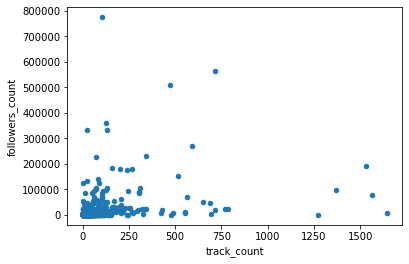

In [24]:
df_users.plot.scatter(x = 'track_count', y = 'followers_count');

#### Mối quan hệ tương quan giữa số lượt like và comment bởi một user

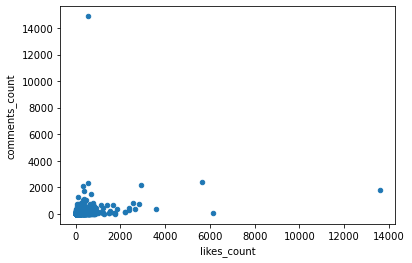

In [25]:
df_users.plot.scatter(x = 'likes_count', y = 'comments_count');

#### Tỉ lệ thành phần thể loại của các track trong mẫu dữ liệu

In [26]:
df_tracks['genre'].head(1000)

0             Electronic
1             Electronic
2             Electronic
3             Electronic
4             Electronic
             ...        
995    OBM Records Prod.
996                House
997                 None
998           Electronic
999           Deep Disco
Name: genre, Length: 1000, dtype: object

In [27]:
df_tracks['genre'].describe()

count     10854
unique     1973
top        None
freq       1558
Name: genre, dtype: object

In [28]:
df_tracks["genre"].unique()

array(['Electronic', 'SuperSpeedPowerPop', 'None', ..., 'Gabriel Le Mar',
       'Electronic Music', 'TechHouse'], dtype=object)

In [29]:
not_none=df_tracks["genre"]!='None'
df_tracks_notNull=df_tracks[not_none]

In [30]:
genre_count_series=df_tracks_notNull.groupby(['genre']).size()
genre_count_series

genre
"Dancepop" (Dance/Eurodance/Dancepop)    2
"Pop"                                    6
#BORDERLINE OBJEKTIV SUBJEKT             1
$ayonara.                                1
( ͡° ͜ʖ ͡°)                              1
                                        ..
♥                                        1
✌                                        1
❆❅❉                                      1
『drum+bass』                              1
宇多田ヒカル                                   1
Length: 1972, dtype: int64

In [31]:
genre_count_series= genre_count_series[genre_count_series>100].sort_values()

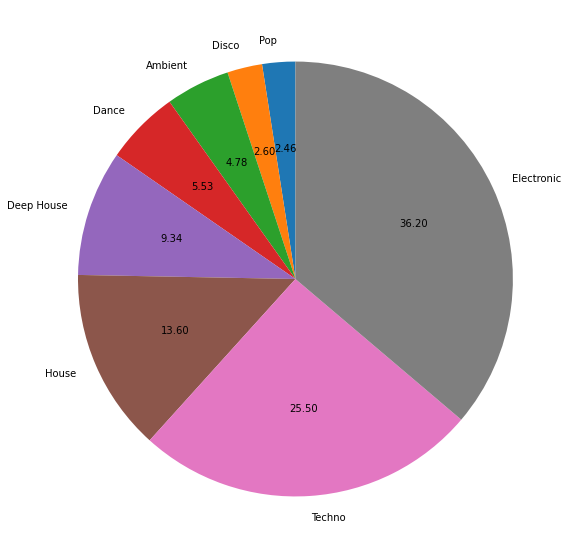

In [32]:
plt.figure(figsize=(10, 10), dpi=72)
plt.pie(genre_count_series,labels = genre_count_series.index, autopct='%1.2f',startangle=90)
plt.show()

##### Jointplot <a class="anchor" id="c3522"></a>

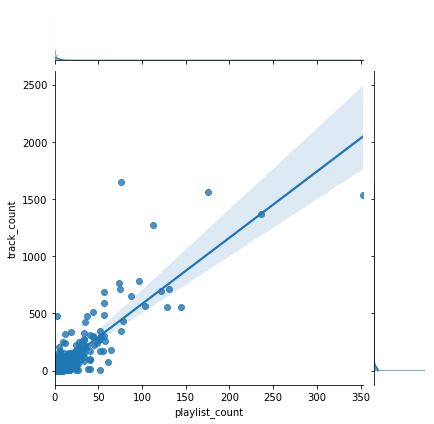

In [33]:
sns.jointplot(x = "playlist_count", y = "track_count",
              kind = "reg", data = df_users)
plt.show()

In [34]:
# sns.jointplot(x = "playback_count", y = "comment_count",
#               kind = "scatter", data = df_tracks)
# plt.show()

##### Correlation Matrix <a class="anchor" id="c3522"></a>

<AxesSubplot:>

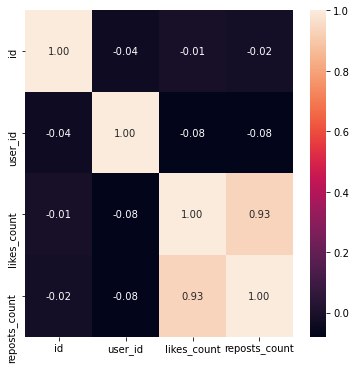

In [35]:
fig = plt.figure(figsize=(6,6))
corr = df_playlists.select_dtypes(include = ['float64', 'int64']).corr()
sns.heatmap(corr, annot = True, fmt = '.2f')

<AxesSubplot:>

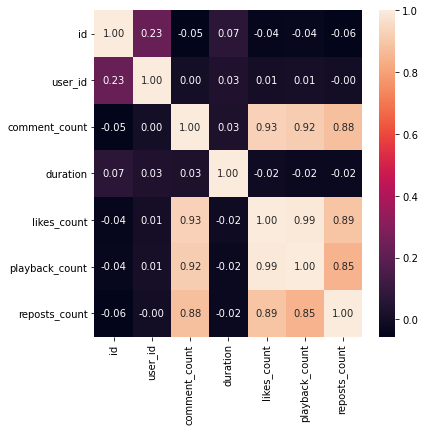

In [36]:
fig = plt.figure(figsize=(6,6))
corr = df_tracks.select_dtypes(include = ['float64', 'int64']).corr()
sns.heatmap(corr, annot = True, fmt = '.2f')

<AxesSubplot:>

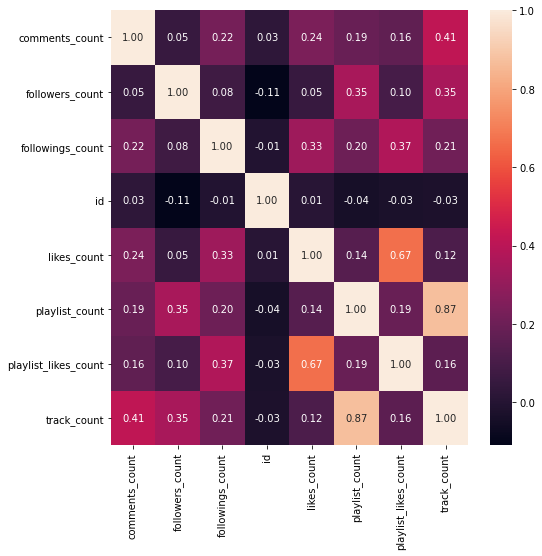

In [37]:
fig = plt.figure(figsize=(8,8))
corr = df_users[df_users.columns.difference(['groups_count'])]
corr = corr.select_dtypes(include = ['float64', 'int64']).corr()
sns.heatmap(corr, annot = True, fmt = '.2f')